# An√°lise de Dados de Marca, Sa√∫de e Reputa√ß√£o
Objetivo da An√°lise

Este estudo busca compreender a reputa√ß√£o e sa√∫de de marca com base em crit√©rios de percep√ß√£o do consumidor ‚Äî como sabor, pre√ßo, popularidade, disponibilidade no mercado e variedade de sabores.
O objetivo √© identificar fatores determinantes da popularidade, semelhan√ßas entre marcas e o equil√≠brio interno de atributos que sustentam a for√ßa competitiva de cada marca no mercado de bebidas.

## Radar Chart ‚Äî Compara√ß√£o Multidimensional de Desempenho

O gr√°fico radar apresenta uma vis√£o multivariada do desempenho de cada marca em rela√ß√£o aos crit√©rios avaliados.

No contexto de reputa√ß√£o, cada crit√©rio pode representar um indicador de sa√∫de:

**Sabor** -> Qualidade do produto percebida.

**Pre√ßo** -> Acessibilidade e percep√ß√£o de custo-benef√≠cio.

**Popularidade** -> For√ßa da marca e identifica√ß√£o emocional.

**Disponibilidade** -> Alcance de distribui√ß√£o e presen√ßa no mercado.

**Variedade de sabores** -> Inova√ß√£o e diversifica√ß√£o de portf√≥lio.


Esses indicadores ajudam a responder perguntas como:

- ‚ÄúOnde a marca est√° se desconectando do p√∫blico?‚Äù

- ‚ÄúO que o consumidor valoriza mais?‚Äù

- ‚ÄúQual marca est√° mais vulner√°vel ou mais s√≥lida?‚Äù

### Interpreta√ß√£o:

Coca-Cola mant√©m alta performance em praticamente todos os crit√©rios, destacando-se em Popularidade e Disponibilidade.

Pepsi exibe perfil equilibrado, com boa pontua√ß√£o em Pre√ßo e Popularidade.

Guaran√° Antarctica mostra for√ßa em Disponibilidade e Sabor.

Dolly e Sukita destacam-se apenas em Pre√ßo, refletindo uma estrat√©gia de valor acess√≠vel.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyBboxPatch

dados = {
    'Crit√©rio': ['Sabor', 'Pre√ßo', 'Popularidade', 'Disponibilidade no mercado', 'Variedade de sabores'],
    'Coca-Cola': [9, 5, 10, 10, 8],
    'Pepsi': [8, 7, 8, 9, 7],
    'Guaran√° Antarctica': [8, 6, 9, 9, 6],
    'Dolly': [6, 9, 6, 7, 5],
    'Sukita': [7, 8, 5, 6, 6]
}
df = pd.DataFrame(dados)

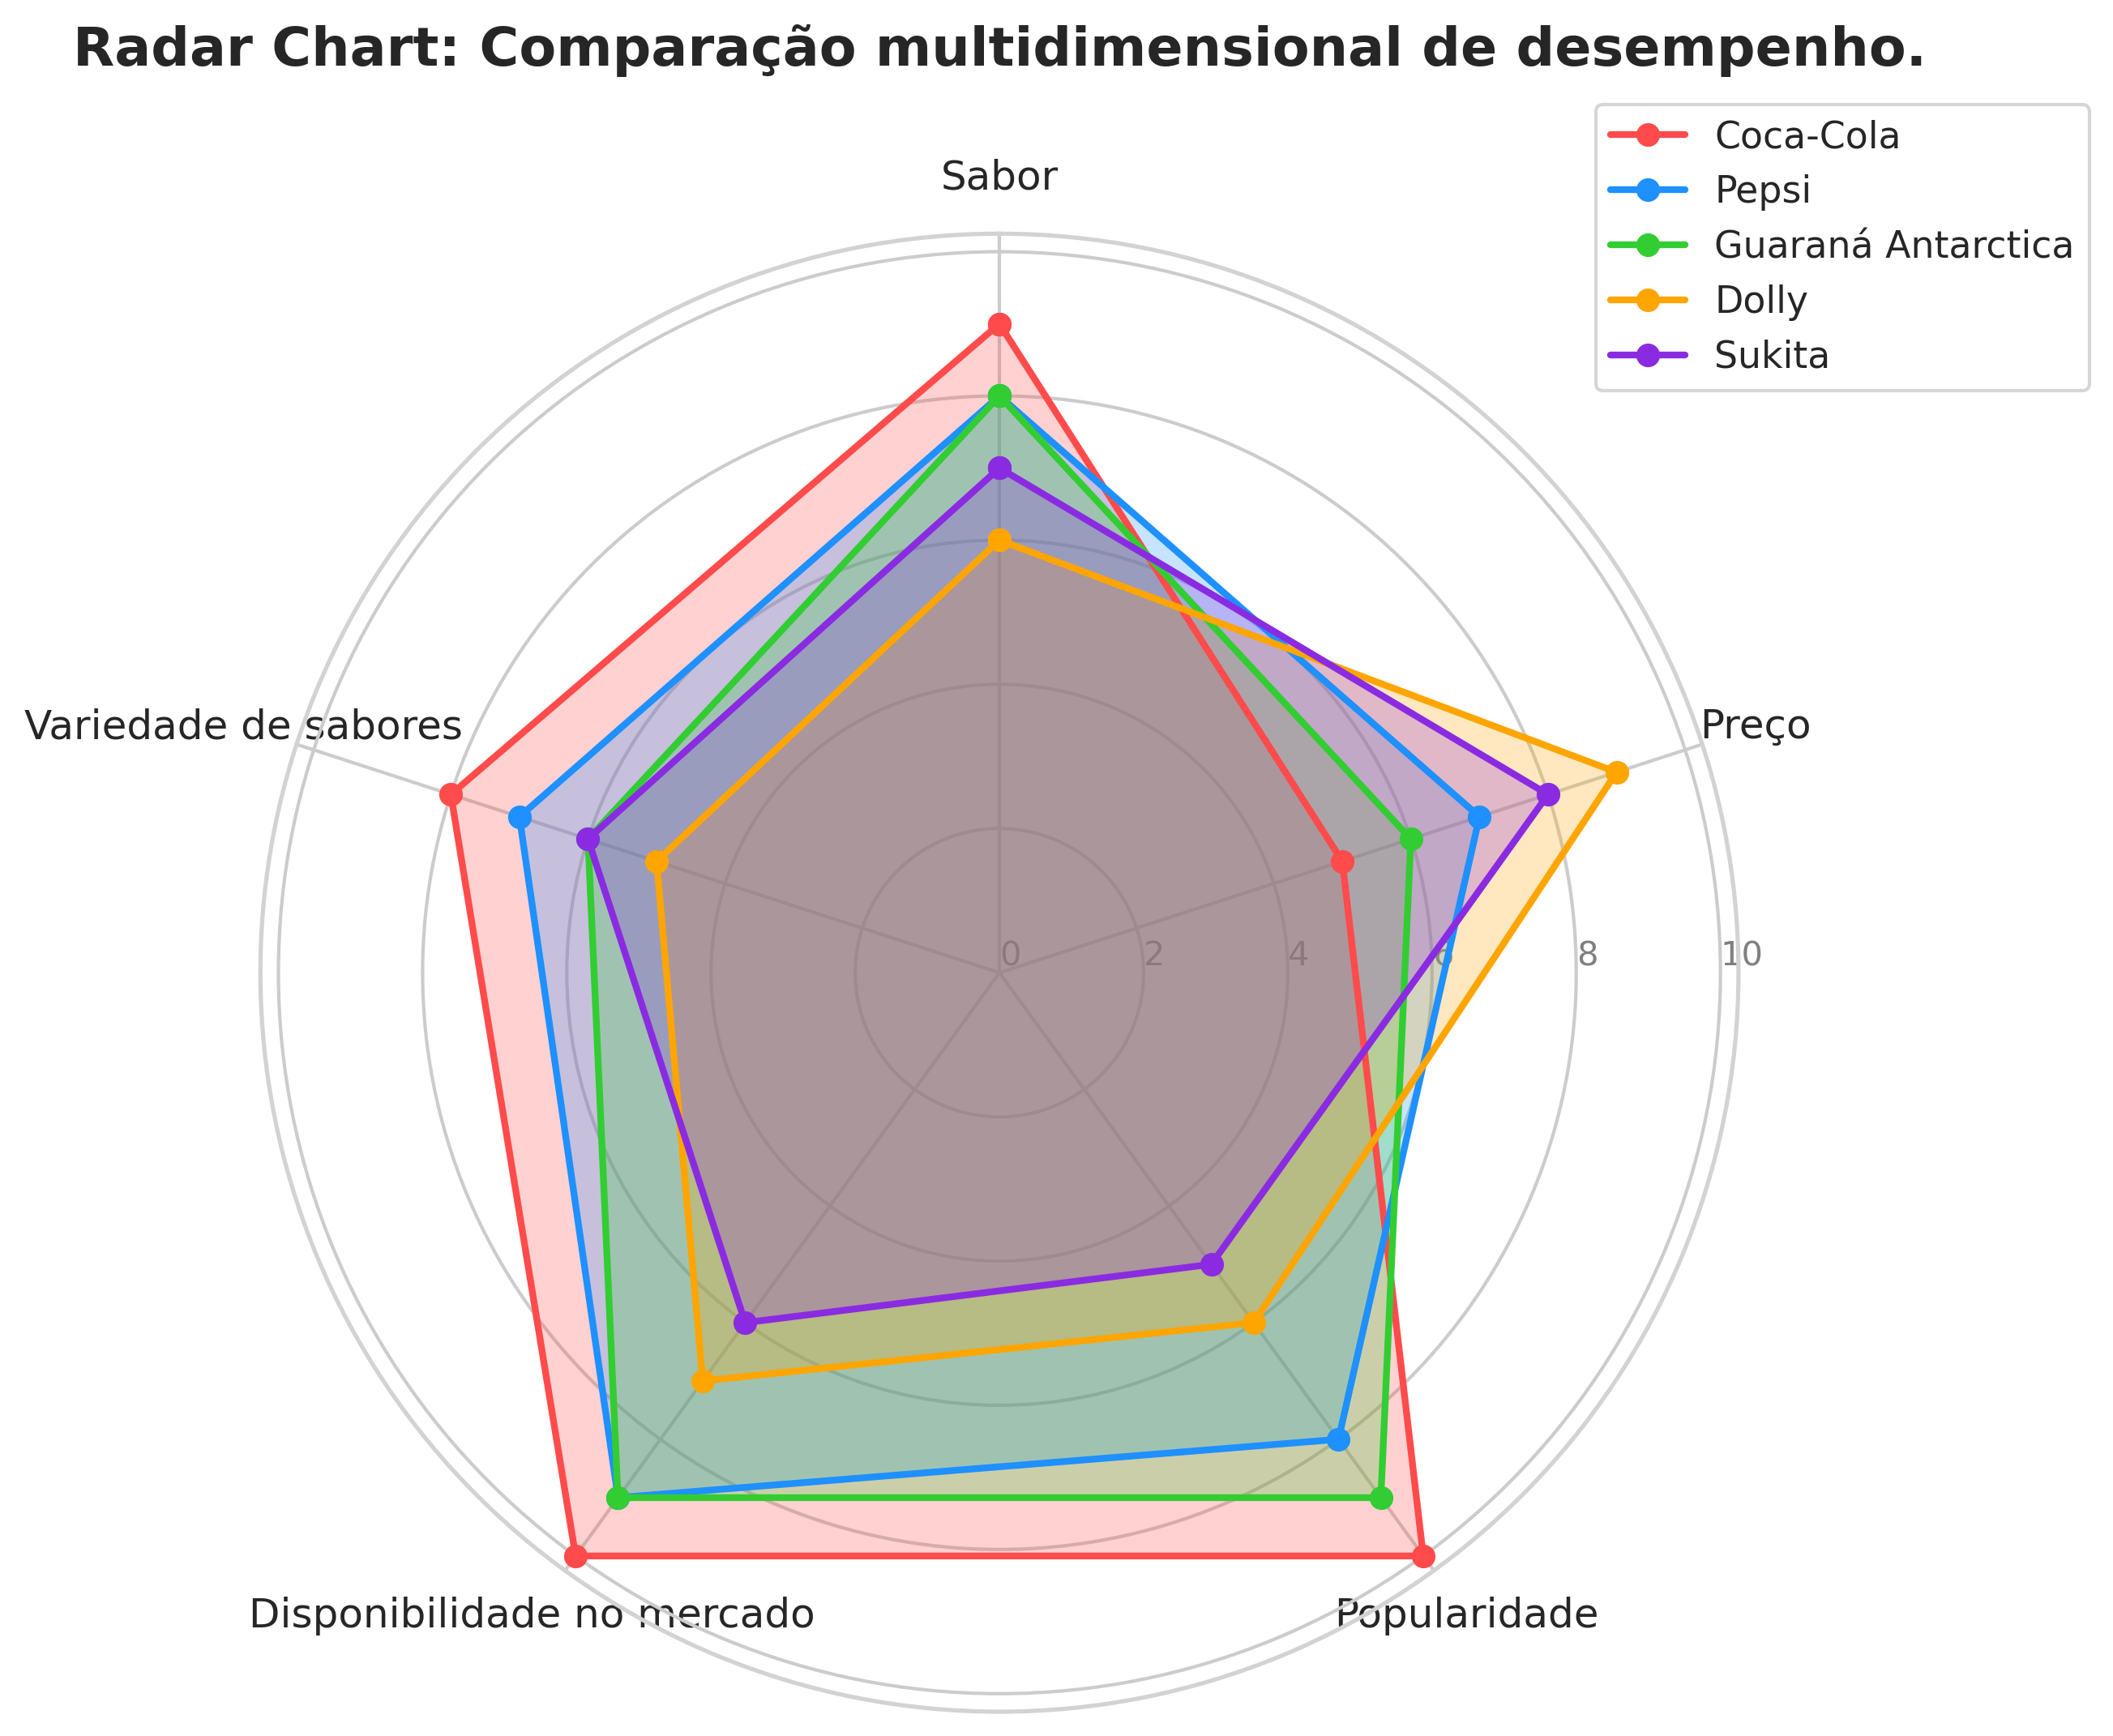

In [10]:
metrics = df['Crit√©rio'].tolist()
marcas = df.columns[1:].tolist()

# --- Fun√ß√£o de gr√°fico radar ---
def plot_radar_chart(df, metrics, marcas, title=" "):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])  # fecha o c√≠rculo

    fig, ax = plt.subplots(figsize=(9, 9), subplot_kw={'projection': 'polar'})

    # Estilo geral
    ax.set_title(title, y=1.1, fontsize=16, fontweight='bold')
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    ax.spines['polar'].set_color('lightgrey')

    # Paleta de cores
    color_palette = ['#FF4B4B', '#1E90FF', '#32CD32', '#FFA500', '#8A2BE2']

    # Plotar cada marca
    for idx, marca in enumerate(marcas):
        values = df[marca].tolist()
        values = values + [values[0]]  # fecha o c√≠rculo

        ax.plot(theta, values, linewidth=2, linestyle='solid',
                label=marca, marker='o', markersize=6,
                color=color_palette[idx % len(color_palette)])
        ax.fill(theta, values, alpha=0.25, color=color_palette[idx % len(color_palette)])

    # Eixos e r√≥tulos
    ax.set_xticks(theta[:-1])
    ax.set_xticklabels(metrics, size=12)
    ax.set_yticks(range(0, 11, 2))
    ax.set_yticklabels([str(i) for i in range(0, 11, 2)], color="gray", size=10)
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1))

    plt.tight_layout()
    return fig

# --- Gerar gr√°fico ---
fig = plot_radar_chart(df, metrics, marcas, title="Radar Chart: Compara√ß√£o multidimensional de desempenho.")
plt.show()

## Reputa√ß√£o Geral ‚Äî M√©dia de Desempenho por Marca

A pontua√ß√£o m√©dia sintetiza o desempenho global de cada marca.

Ranking de reputa√ß√£o:

Coca-Cola ‚Äî 8.4

Pepsi ‚Äî 7.8

Guaran√° Antarctica ‚Äî 7.6

Dolly ‚Äî 6.6

Sukita ‚Äî 6.4

Insight: Coca-Cola lidera com ampla vantagem, consolidando-se como refer√™ncia de qualidade e lembran√ßa de marca.

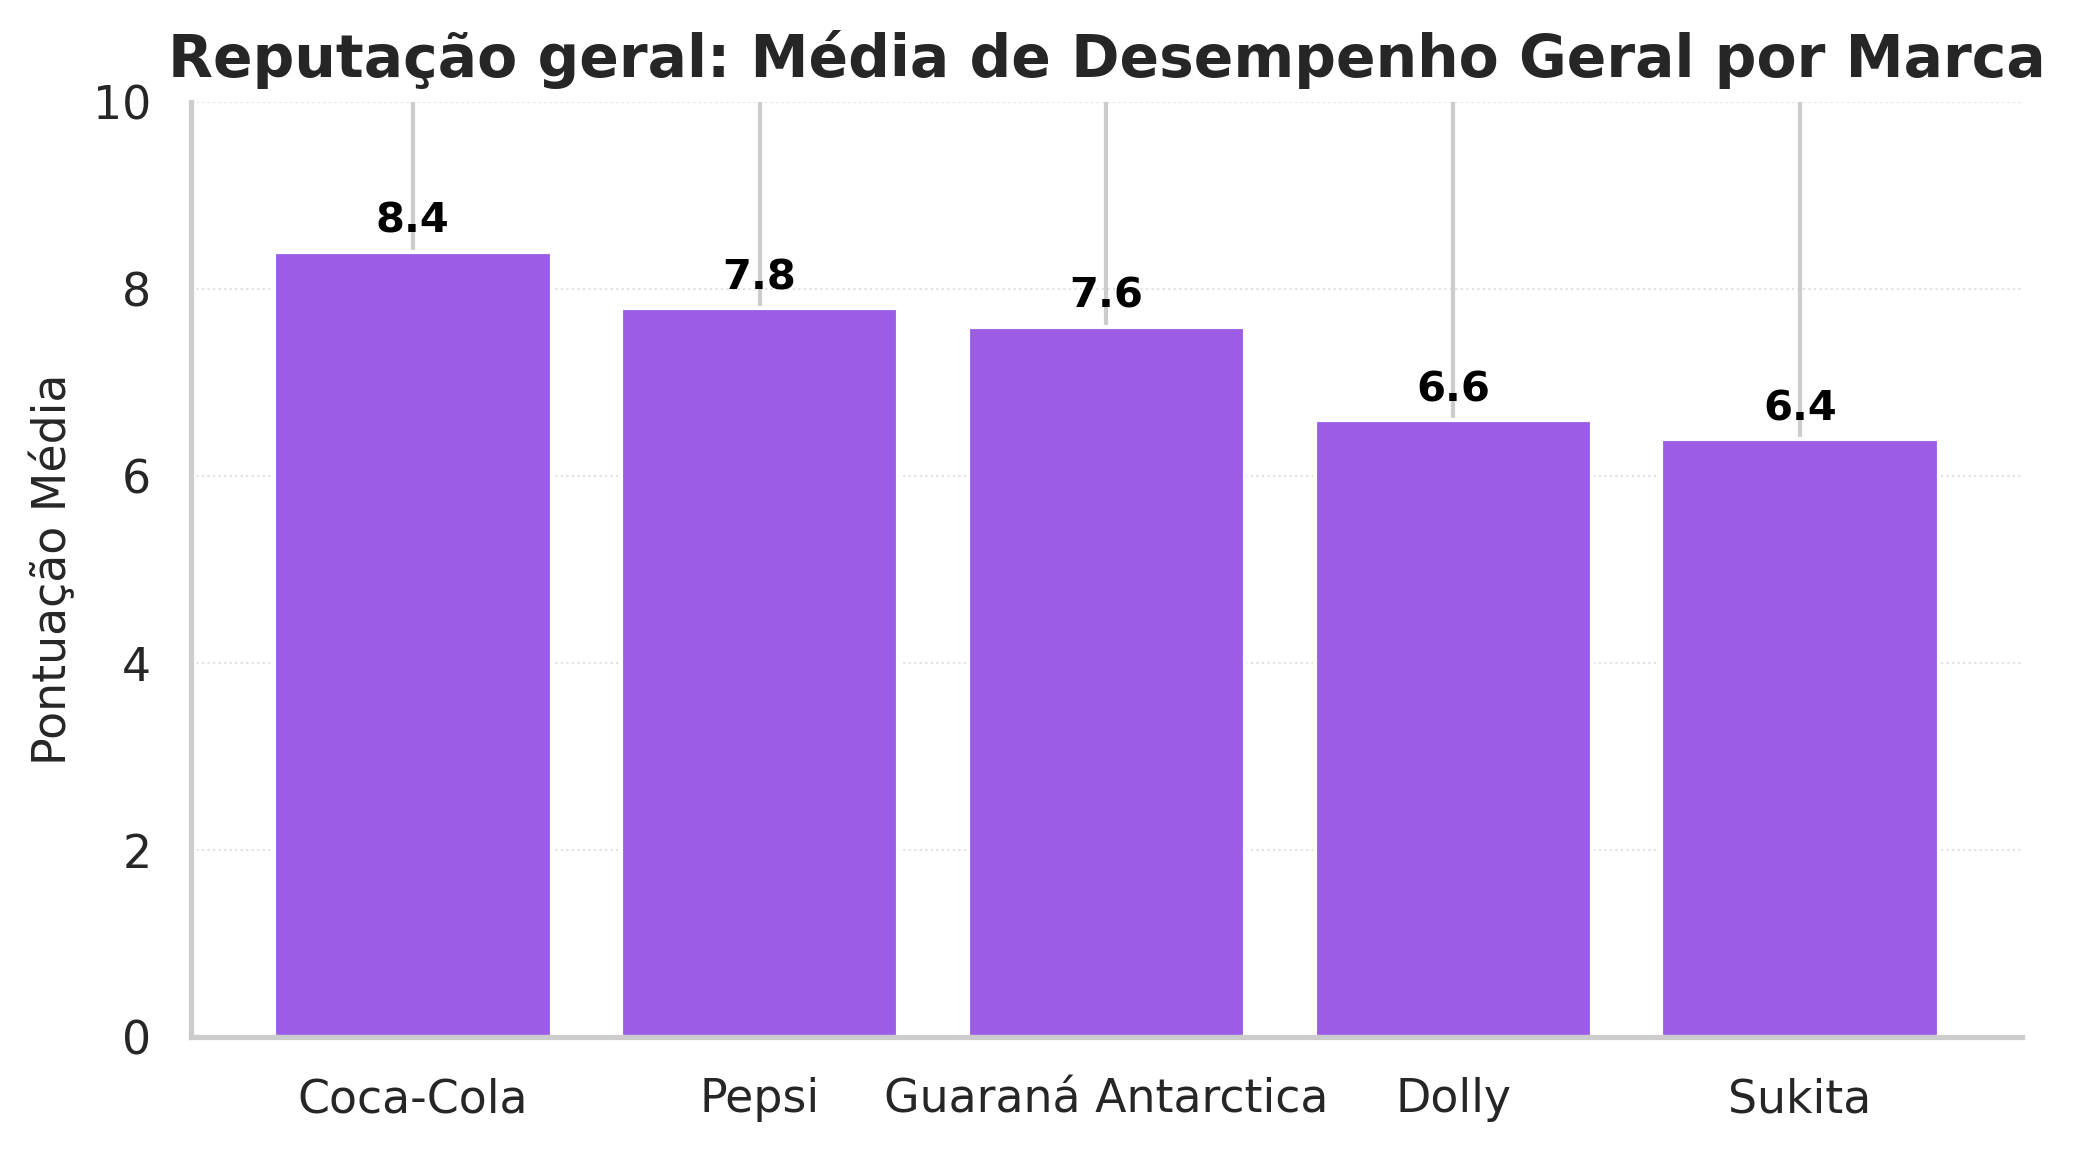

In [15]:
data = {
    "Marca": ["Coca-Cola", "Pepsi", "Guaran√° Antarctica", "Dolly", "Sukita"],
    "Sabor": [9, 8, 8, 6, 7],
    "Pre√ßo": [5, 7, 6, 9, 8],
    "Popularidade": [10, 8, 9, 6, 5],
    "Disponibilidade no mercado": [10, 9, 9, 7, 6],
    "Variedade de sabores": [8, 7, 6, 5, 6]
}
df = pd.DataFrame(data)

# --- C√°lculo das m√©dias ---
df["M√©dia"] = df[["Sabor", "Pre√ßo", "Popularidade", "Disponibilidade no mercado", "Variedade de sabores"]].mean(axis=1)
df_plot = df[["Marca", "M√©dia"]].sort_values("M√©dia", ascending=False)

# --- Gr√°fico ---
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(7, 4))
cor_barras = "#9B5DE5"

bars = ax.bar(df_plot["Marca"], df_plot["M√©dia"], color=cor_barras)

# R√≥tulos
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
            f"{bar.get_height():.1f}", ha='center', color='black', fontsize=10, fontweight='bold')

# Ajustes visuais
ax.set_ylim(0, 10)
ax.set_ylabel("Pontua√ß√£o M√©dia", fontsize=11)
ax.set_title("Reputa√ß√£o geral: M√©dia de Desempenho Geral por Marca", fontsize=14, fontweight='bold')
ax.grid(axis='y', linestyle=':', linewidth=0.5, alpha=0.6)
sns.despine()

plt.tight_layout()
plt.show()

## Correla√ß√£o entre Crit√©rios e Popularidade

Foram calculadas as correla√ß√µes de Pearson entre Popularidade e os demais crit√©rios.
O objetivo √© entender quais atributos mais impactam a popularidade de cada marca.

| Crit√©rio                 | Correla√ß√£o (r) com Popularidade | Interpreta√ß√£o                                                                                |
| ------------------------ | ------------------------------- | -------------------------------------------------------------------------------------------- |
| **Sabor**                | +0.87                           | Forte correla√ß√£o positiva ‚Äî sabor √© altamente determinante.                                  |
| **Pre√ßo**                | +0.91                           | Forte correla√ß√£o positiva ‚Äî percep√ß√£o de valor e pre√ßo equilibrado impulsionam popularidade. |
| **Disponibilidade**      | +0.38                           | Correla√ß√£o muito forte ‚Äî marcas amplamente dispon√≠veis s√£o tamb√©m as mais populares.|
| **Variedade de sabores** | +0.72                           | Correla√ß√£o moderada ‚Äî diversifica√ß√£o contribui para maior apelo de marca.                    |


S√≠ntese: o p√∫blico associa popularidade a sabor e valor percebido (pre√ßo) ‚Äî dois pilares-chave da decis√£o de compra.

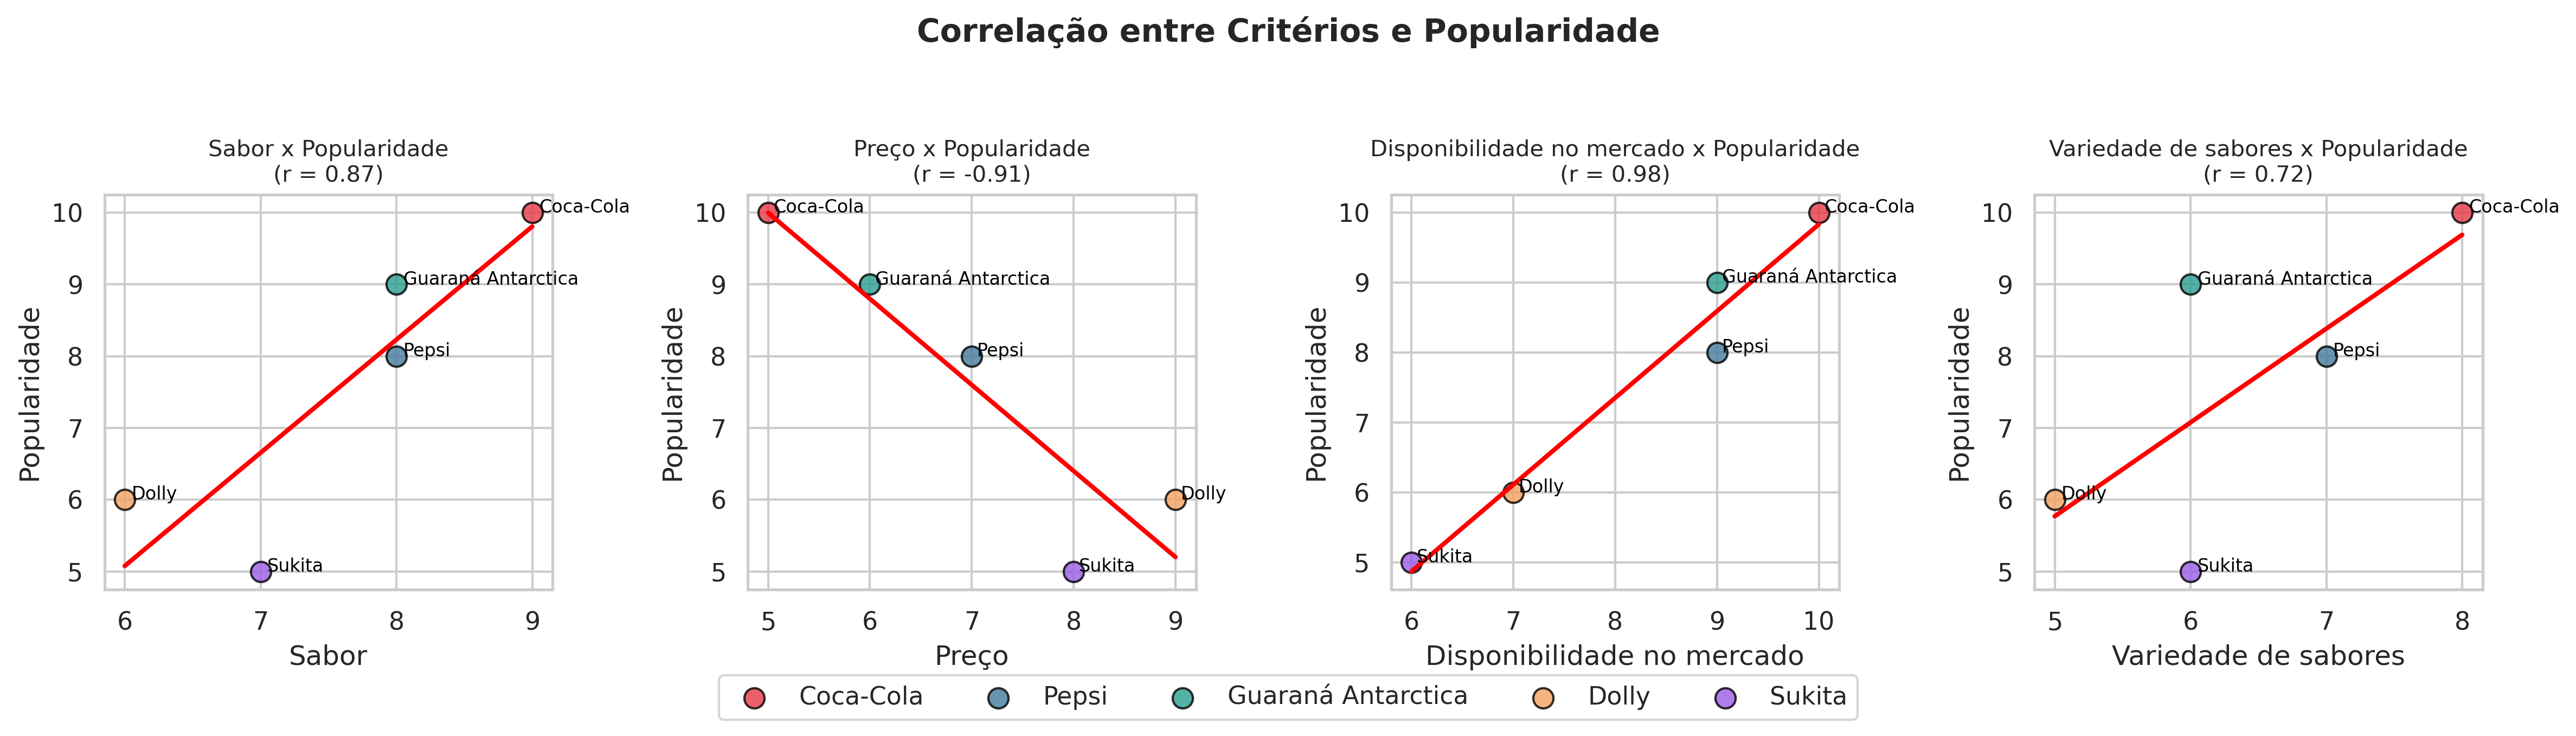

In [11]:
df_t = df.set_index('Crit√©rio').T  # linhas = marcas | colunas = crit√©rios

# --- Correla√ß√£o de Pearson ---
variaveis = ['Sabor', 'Pre√ßo', 'Disponibilidade no mercado', 'Variedade de sabores']
correlacoes = {v: df_t[v].corr(df_t['Popularidade'], method='pearson') for v in variaveis}

# --- Paleta de cores personalizada ---
cores_marcas = {
   'Coca-Cola': '#E63946',
    'Pepsi': '#457B9D',
    'Guaran√° Antarctica': '#2A9D8F',
    'Dolly': '#F4A261',
    'Sukita': '#9B5DE5'
}

# --- Gr√°ficos de dispers√£o ---
fig, axes = plt.subplots(1, len(variaveis), figsize=(16, 4))
sns.set_style("whitegrid")

for i, var in enumerate(variaveis):
    # Plot manual com cores por marca
    for marca in df_t.index:
        axes[i].scatter(
            df_t.loc[marca, var],
            df_t.loc[marca, 'Popularidade'],
            color=cores_marcas[marca],
            s=80,
            edgecolor='black',
            alpha=0.8,
            label=marca if i == 0 else ""  # legenda apenas no primeiro gr√°fico
        )
        axes[i].text(
            df_t.loc[marca, var] + 0.05,
            df_t.loc[marca, 'Popularidade'],
            marca,
            fontsize=8,
            color='black'
        )
    
    # Linha de regress√£o
    sns.regplot(
        x=df_t[var],
        y=df_t['Popularidade'],
        ax=axes[i],
        scatter=False,
        line_kws={'color': 'red', 'lw': 2},
        ci=None
    )
    
    axes[i].set_title(f"{var} x Popularidade\n(r = {correlacoes[var]:.2f})", fontsize=10)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Popularidade")

# --- Legenda geral ---
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.05))

# --- T√≠tulo centralizado no topo ---
fig.suptitle("Correla√ß√£o entre Crit√©rios e Popularidade",
             fontsize=14, fontweight='bold', y=1.05, ha='center')

plt.tight_layout()
plt.show()

## An√°lise de Clusteriza√ß√£o de Marcas (K-Means)

O algoritmo K-Means foi aplicado para identificar grupos de similaridade entre as marcas com base nas vari√°veis Pre√ßo e Sabor, ambas padronizadas por meio do StandardScaler.
O modelo foi configurado para 3 clusters (k=3), de forma a destacar padr√µes de percep√ß√£o entre marcas premium, intermedi√°rias e populares.

### Interpreta√ß√£o dos Agrupamentos

Cluster 1 (Regi√£o Verde) ‚Äî Marcas de equil√≠brio sensorial e comercial
‚Üí Pepsi e Guaran√° Antarctica se posicionam pr√≥ximas, apresentando bom equil√≠brio entre sabor e pre√ßo.
S√£o marcas amplamente aceitas, com percep√ß√£o positiva sem atingir o n√≠vel de exclusividade da l√≠der.

Cluster 2 (Regi√£o Roxa) ‚Äî Marcas de apelo popular e pre√ßo acess√≠vel
‚Üí Dolly e Sukita formam um grupo mais voltado ao p√∫blico de custo-benef√≠cio.
O foco dessas marcas est√° em pre√ßo competitivo, ainda que com menor percep√ß√£o sensorial.

Cluster 3 (Regi√£o Laranja) ‚Äî Posicionamento premium e consolidado
‚Üí Coca-Cola aparece isolada neste grupo, refor√ßando uma imagem diferenciada e consolidada no mercado.
Seu alto desempenho em sabor, mesmo com pre√ßo mais elevado, a destaca como marca de refer√™ncia.

### Insights Estrat√©gicos

O mapa de clusters mostra estruturas competitivas bem definidas, com segmenta√ß√£o clara entre o p√∫blico premium e o popular.

Coca-Cola ocupa um espa√ßo estrat√©gico isolado, sugerindo forte valor de marca e fidelidade do consumidor.

Pepsi e Guaran√° Antarctica s√£o concorrentes diretos, disputando o espa√ßo intermedi√°rio do mercado.

Dolly e Sukita podem investir em melhoria sensorial ou rebranding para tentar migrar para um cluster de percep√ß√£o superior.

### Aspectos T√©cnicos

O uso do K-Means (k=3) permite identificar padr√µes latentes de percep√ß√£o, assumindo forma√ß√µes esf√©ricas nos dados.

A padroniza√ß√£o das vari√°veis evita distor√ß√µes causadas por escalas diferentes.

A visualiza√ß√£o 2D com fronteiras de decis√£o ilustra as regi√µes de influ√™ncia de cada cluster, facilitando a interpreta√ß√£o dos limites competitivos.

Diagn√≥stico de clusteriza√ß√£o:

                Marca  Pre√ßo  Sabor  Pre√ßo_std  Sabor_std  Cluster
0           Coca-Cola      5      9  -1.568929   1.372813        1
1               Pepsi      6      8  -0.588348   0.392232        0
2  Guaran√° Antarctica      7      8   0.392232   0.392232        0
3               Dolly      8      6   1.372813  -1.568929        2
4              Sukita      7      7   0.392232  -0.588348        0

Centroides dos clusters (x=Pre√ßo, y=Sabor):
 [[ 0.06537205  0.06537205]
 [-1.56892908  1.37281295]
 [ 1.37281295 -1.56892908]]

üìà Silhouette Score: 0.169


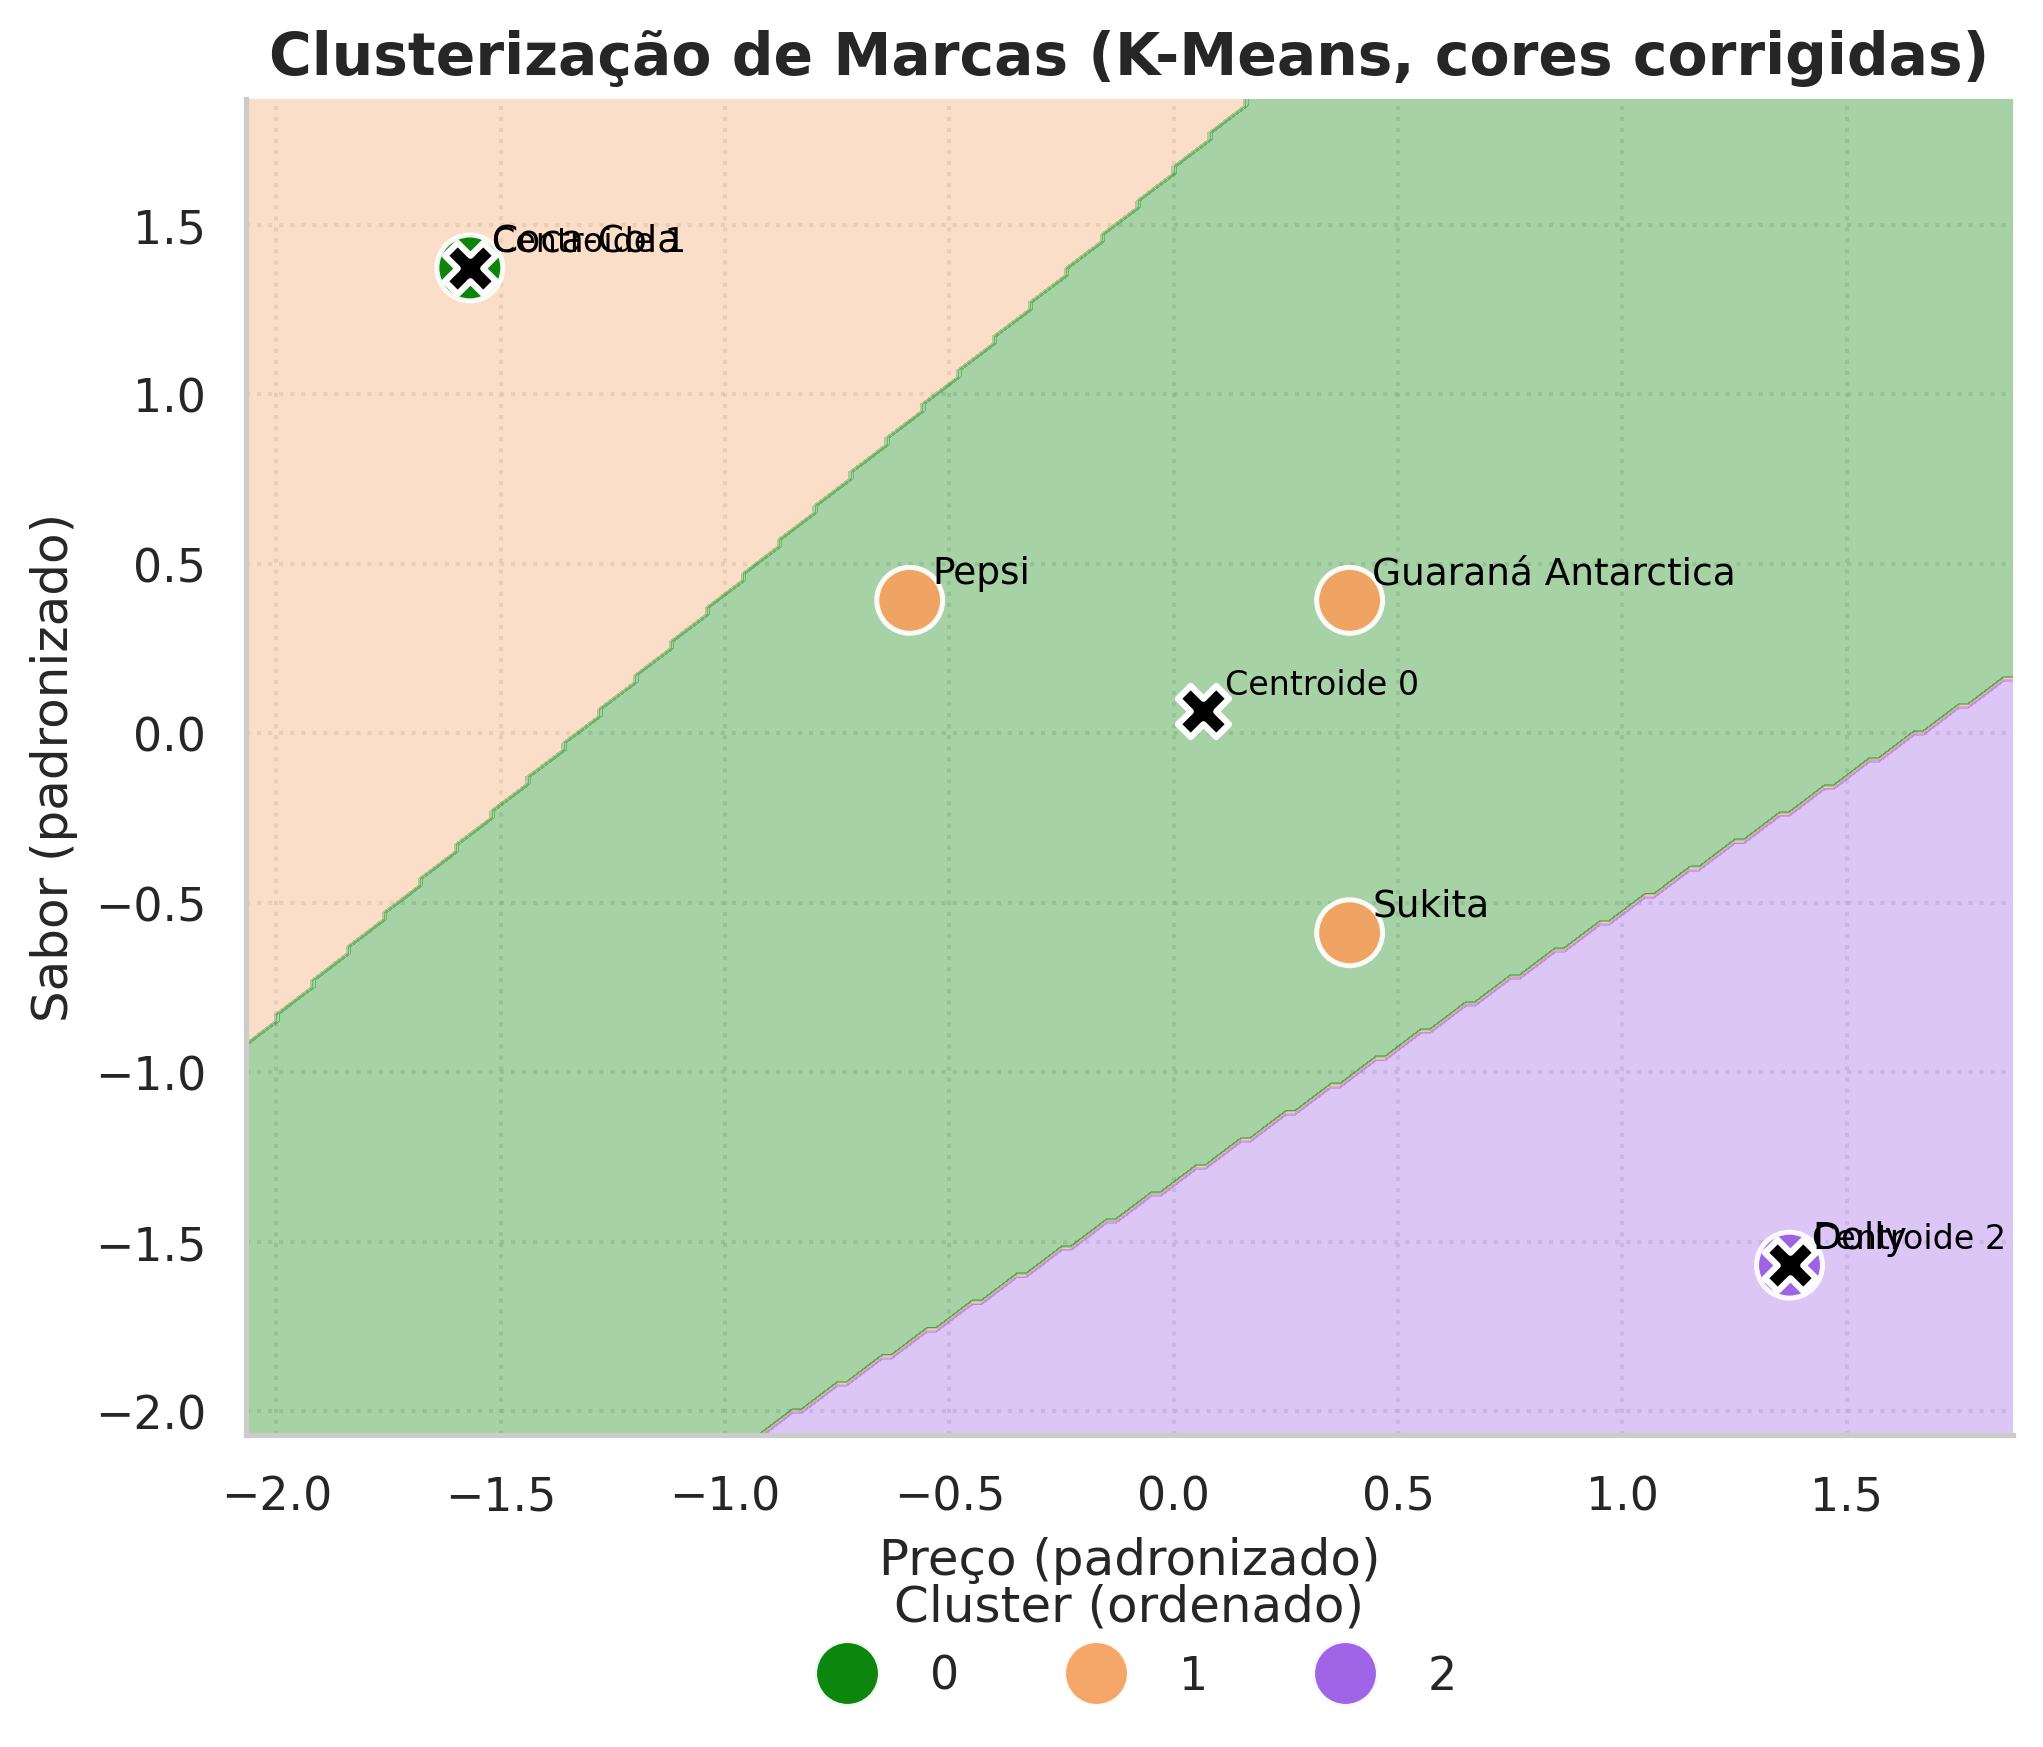


üìä Interpreta√ß√£o dos Clusters:
Cluster 0: Coca-Cola
Cluster 1: Pepsi, Guaran√° Antarctica, Sukita
Cluster 2: Dolly


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap

# ---------------------------------------------------------------
#  Dados de exemplo
# ---------------------------------------------------------------
dados = {
    'Marca': ['Coca-Cola', 'Pepsi', 'Guaran√° Antarctica', 'Dolly', 'Sukita'],
    'Sabor': [9, 8, 8, 6, 7],
    'Pre√ßo': [5, 6, 7, 8, 7],
    'Disponibilidade': [10, 9, 8, 7, 6],
    'Variedade de Sabores': [8, 7, 9, 6, 5],
}
df = pd.DataFrame(dados)

# Selecionar vari√°veis (2D)
X = df[['Pre√ßo', 'Sabor']].values

# Padronizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------------------------------------------
# Aplicar K-Means com 3 clusters
# ---------------------------------------------------------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# Avaliar qualidade
sil_score = silhouette_score(X_scaled, clusters)

# ---------------------------------------------------------------
# Diagn√≥stico r√°pido (quem est√° em qual cluster)
# ---------------------------------------------------------------
coords = X_scaled
df['Pre√ßo_std'] = coords[:, 0]
df['Sabor_std'] = coords[:, 1]
print("Diagn√≥stico de clusteriza√ß√£o:\n")
print(df[['Marca', 'Pre√ßo', 'Sabor', 'Pre√ßo_std', 'Sabor_std', 'Cluster']])
print("\nCentroides dos clusters (x=Pre√ßo, y=Sabor):\n", kmeans.cluster_centers_)
print(f"\nüìà Silhouette Score: {sil_score:.3f}")

# ---------------------------------------------------------------
# Ordenar clusters por posi√ß√£o do centr√≥ide (para cores consistentes)
# ---------------------------------------------------------------
centroids = kmeans.cluster_centers_
order = np.argsort(centroids[:, 0])  # ordenar por eixo x (Pre√ßo)
label_map = {orig: new for new, orig in enumerate(order)}
df['Cluster_Ordenado'] = df['Cluster'].map(label_map)

# ---------------------------------------------------------------
# Criar grid de decis√£o
# ---------------------------------------------------------------
x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# ---------------------------------------------------------------
# Visualiza√ß√£o final
# ---------------------------------------------------------------
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 400

palette = ['green', '#F4A261', '#9B5DE5']
cmap = ListedColormap(palette)

plt.figure(figsize=(7, 6))
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.35)

sns.scatterplot(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    hue=df['Cluster_Ordenado'],
    palette=palette,
    s=250,
    edgecolor='white',
    linewidth=1.2,
    alpha=0.95,
    legend='brief'
)

# Anotar marcas
for i, row in df.iterrows():
    plt.text(
        X_scaled[i, 0] + 0.05,
        X_scaled[i, 1] + 0.05,
        row['Marca'],
        fontsize=9,
        color='black'
    )

# Plotar centr√≥ides
for idx, c in enumerate(centroids):
    plt.scatter(c[0], c[1], c='black', s=150, marker='X', edgecolor='white', linewidth=1.5)
    plt.text(c[0]+0.05, c[1]+0.05, f"Centroide {idx}", fontsize=8, color='black')

plt.title("Clusteriza√ß√£o de Marcas (K-Means, cores corrigidas)", fontsize=14, fontweight='bold')
plt.xlabel("Pre√ßo (padronizado)")
plt.ylabel("Sabor (padronizado)")
plt.legend(title='Cluster (ordenado)', loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=3, frameon=False)
plt.grid(True, linestyle=":", alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# Interpreta√ß√£o autom√°tica
# ---------------------------------------------------------------
print("\nüìä Interpreta√ß√£o dos Clusters:")
for cluster in sorted(df['Cluster_Ordenado'].unique()):
    marcas = df[df['Cluster_Ordenado'] == cluster]['Marca'].tolist()
    print(f"Cluster {cluster}: {', '.join(marcas)}")


## √çndice Composto de Sa√∫de de Marca (Brand Health Score)

O √≠ndice foi calculado a partir da m√©dia normalizada dos crit√©rios:
**Sabor**, **Pre√ßo**, **Popularidade**, **Disponibilidade no mercado** e **Variedade de sabores**.

- **Coca-Cola** lidera amplamente, refletindo for√ßa global e consist√™ncia de marca.
- **Pepsi** e **Guaran√° Antarctica** apresentam boa sa√∫de, com equil√≠brio entre percep√ß√£o e presen√ßa de mercado.
- **Dolly** e **Sukita** mostram baixo desempenho relativo, concentrando for√ßa apenas em pre√ßo.

Esse √≠ndice resume a *sa√∫de geral da marca*, permitindo comparar estrat√©gias competitivas.


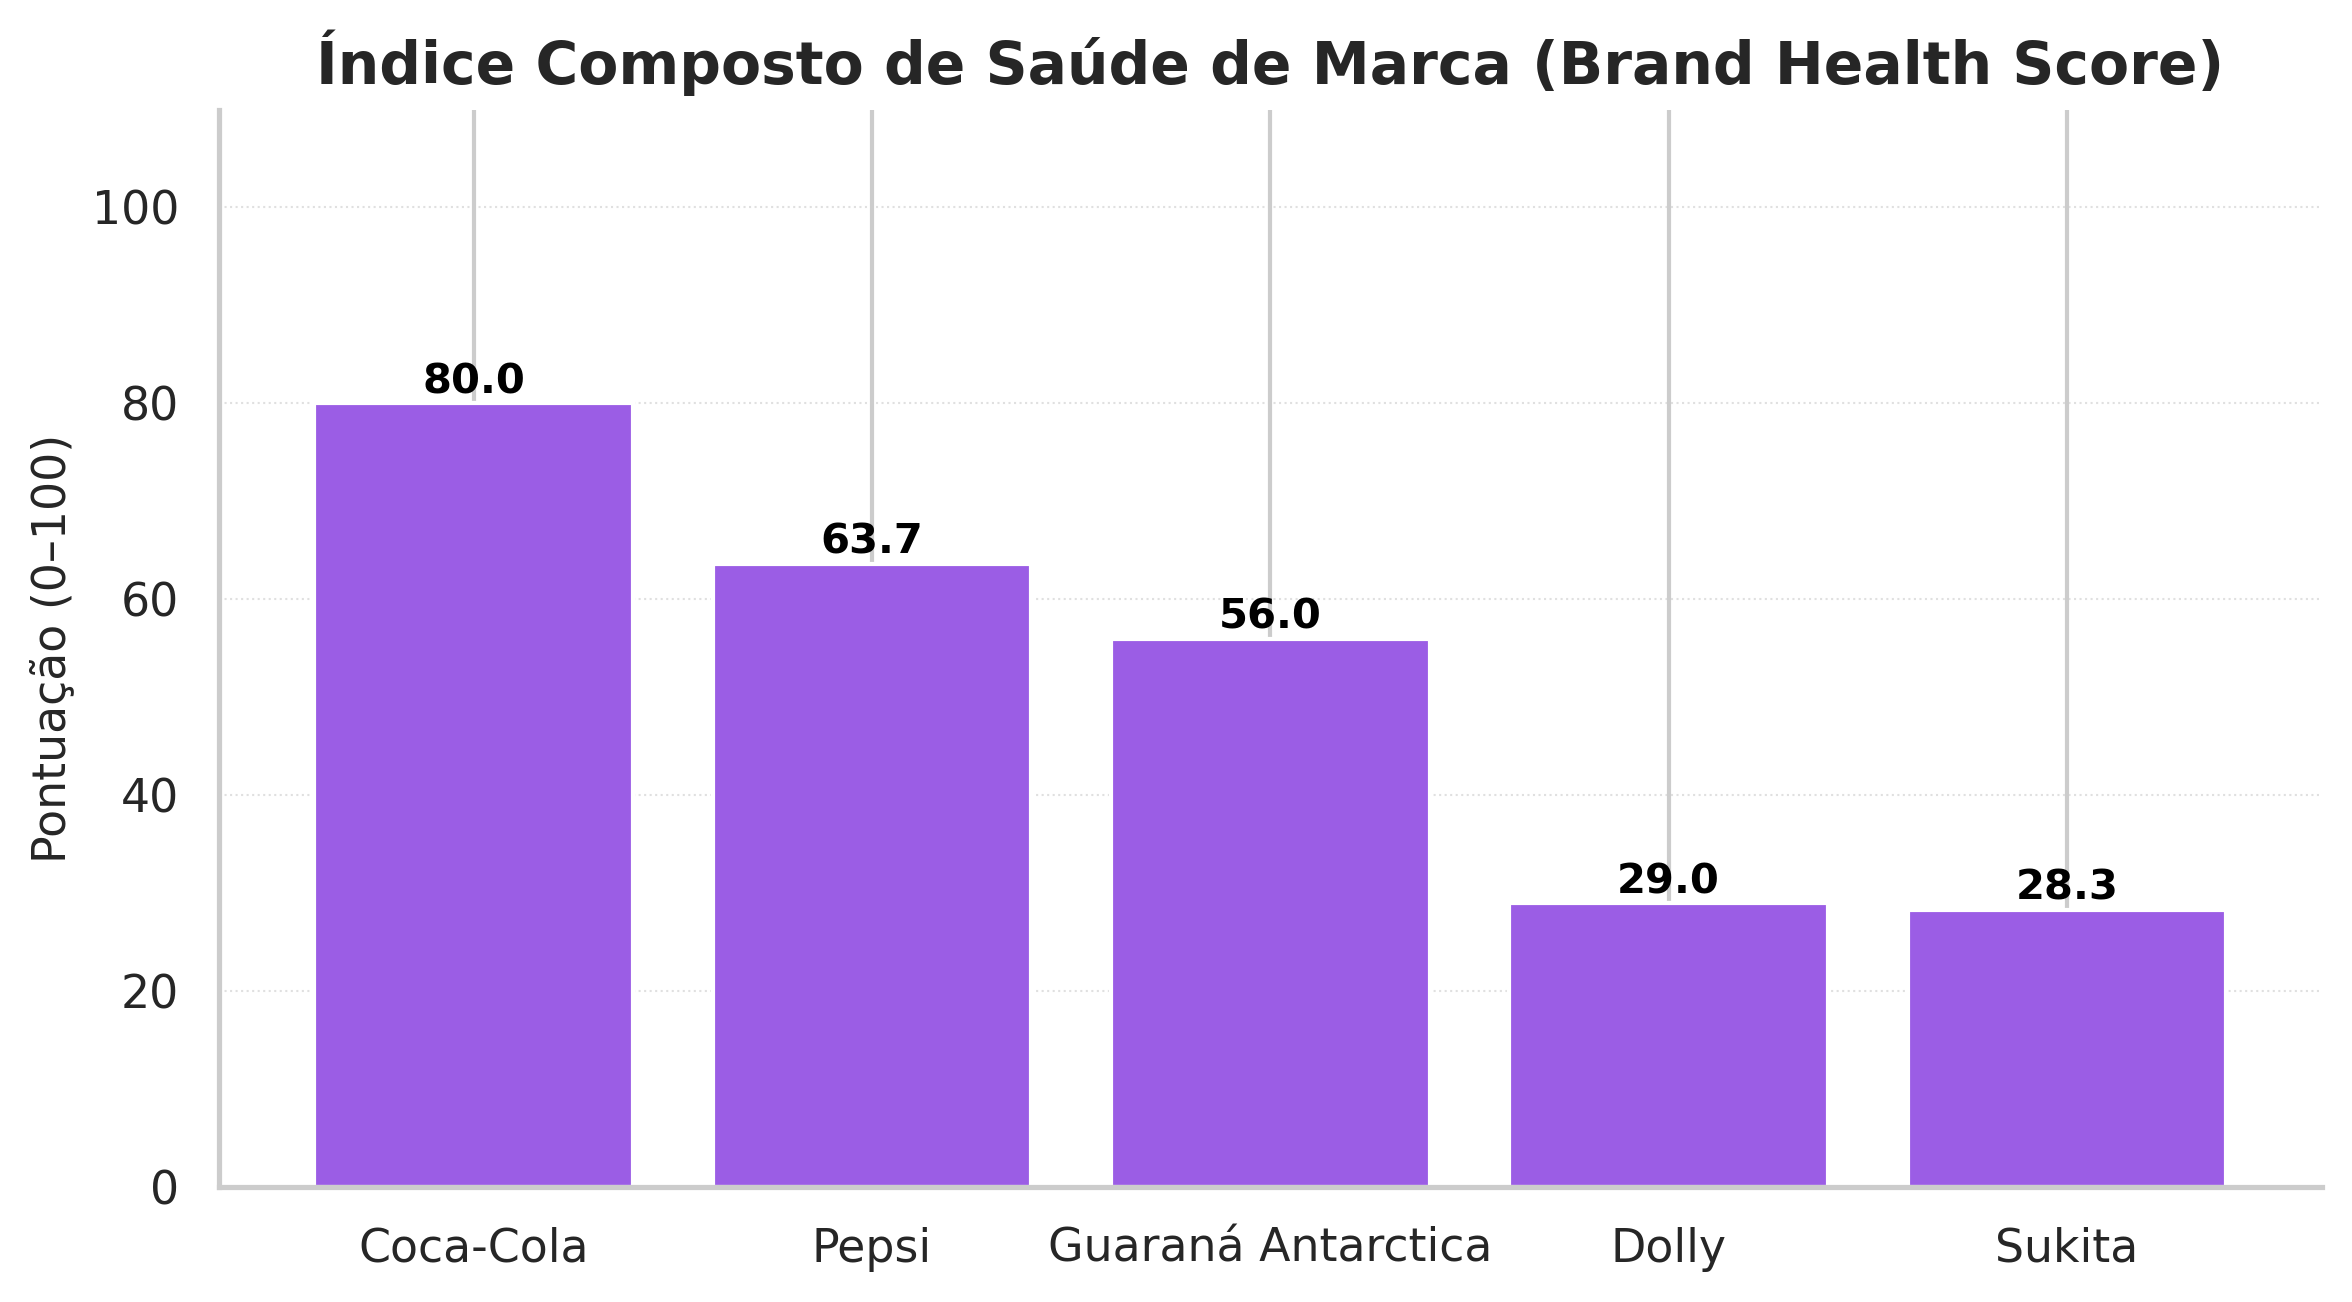

In [16]:
from sklearn.preprocessing import MinMaxScaler

# --- Dados ---
data = {
    "Marca": ["Coca-Cola", "Pepsi", "Guaran√° Antarctica", "Dolly", "Sukita"],
    "Sabor": [9, 8, 8, 6, 7],
    "Pre√ßo": [5, 7, 6, 9, 8],
    "Popularidade": [10, 8, 9, 6, 5],
    "Disponibilidade no mercado": [10, 9, 9, 7, 6],
    "Variedade de sabores": [8, 7, 6, 5, 6]
}
df = pd.DataFrame(data)

# --- Normaliza√ß√£o ---
metricas = ["Sabor", "Pre√ßo", "Popularidade", "Disponibilidade no mercado", "Variedade de sabores"]
scaler = MinMaxScaler()
df[metricas] = scaler.fit_transform(df[metricas])

# --- √çndice composto ---
df["Brand_Health_Score"] = df[metricas].mean(axis=1) * 100
df_plot = df[["Marca", "Brand_Health_Score"]].sort_values("Brand_Health_Score", ascending=False)

# --- Gr√°fico ---
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 4.5))
cor_barras = "#9B5DE5"

bars = ax.bar(df_plot["Marca"], df_plot["Brand_Health_Score"], color=cor_barras)

# R√≥tulos
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f"{bar.get_height():.1f}", ha='center', color='black', fontsize=10, fontweight='bold')

# Ajustes visuais
ax.set_ylim(0, 110)
ax.set_ylabel("Pontua√ß√£o (0‚Äì100)", fontsize=11)
ax.set_title("√çndice Composto de Sa√∫de de Marca (Brand Health Score)", fontsize=14, fontweight='bold')
ax.grid(axis='y', linestyle=':', linewidth=0.5, alpha=0.6)
sns.despine()

plt.tight_layout()
plt.show()

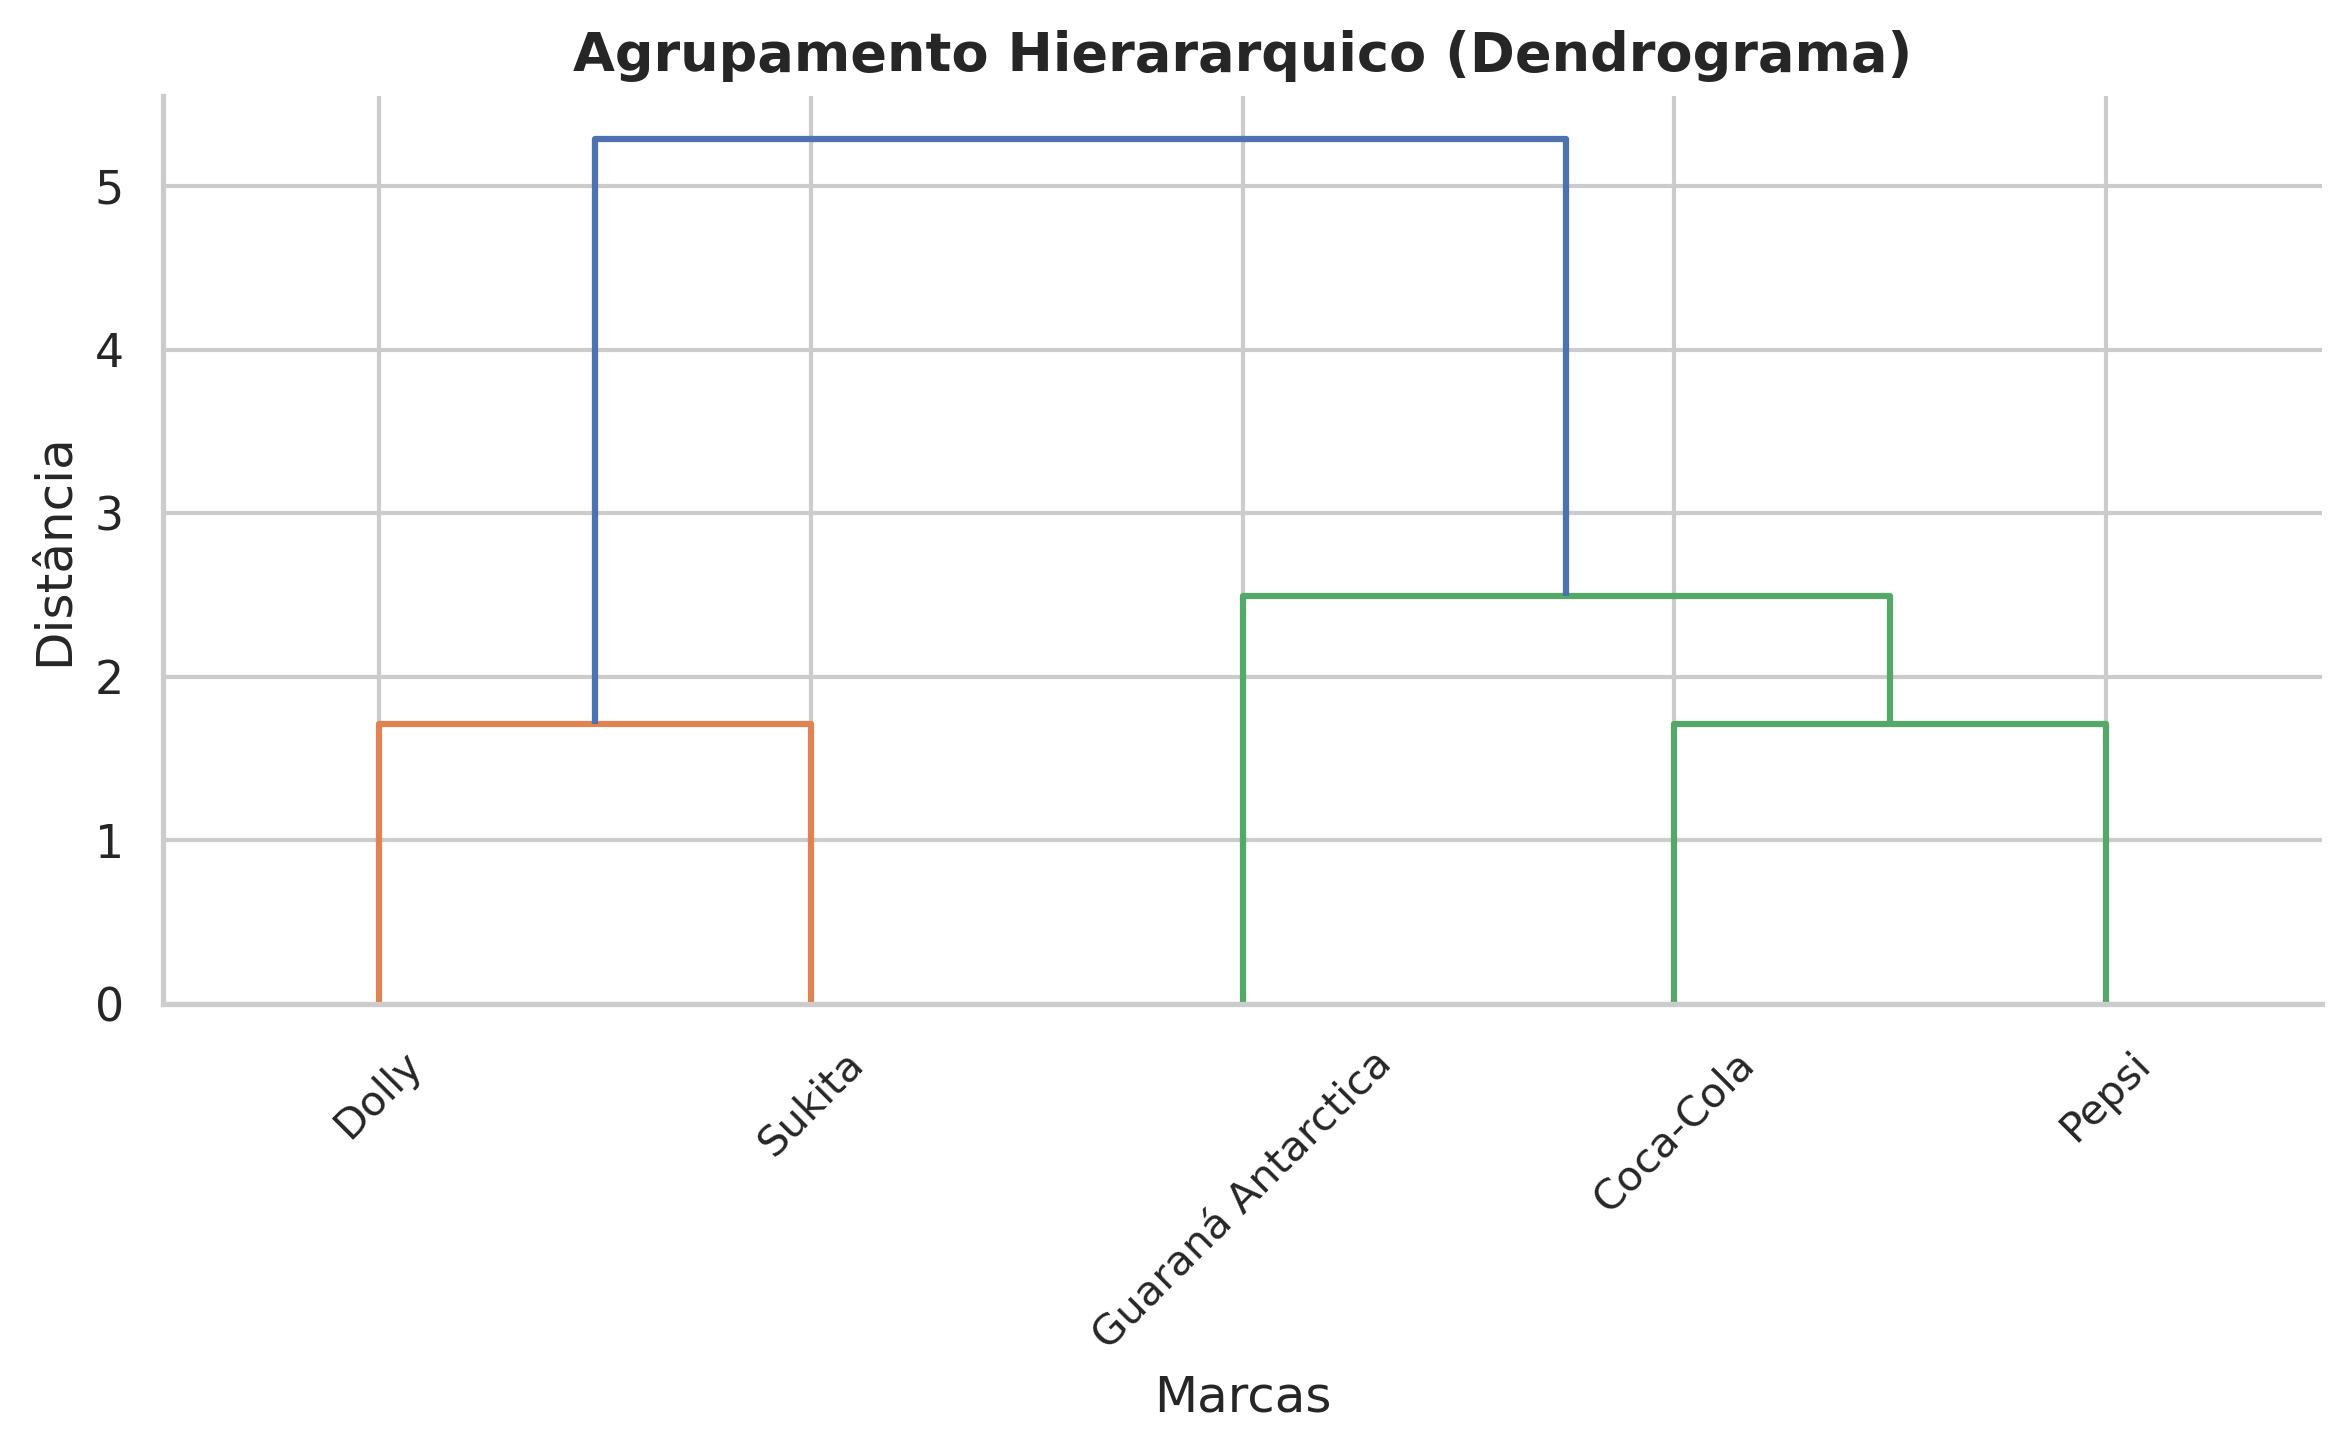

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# --- Dataset exemplo ---
dados = {
    'Marca': ['Coca-Cola', 'Pepsi', 'Guaran√° Antarctica', 'Dolly', 'Sukita'],
    'Sabor': [9, 8, 8, 6, 7],
    'Pre√ßo': [5, 6, 7, 8, 7],
    'Disponibilidade': [10, 9, 8, 7, 6],
    'Variedade de Sabores': [8, 7, 9, 6, 5],
}
df = pd.DataFrame(dados)

# --- Pr√©-processamento ---
X = df[['Sabor', 'Pre√ßo', 'Disponibilidade', 'Variedade de Sabores']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Hierarchical Clustering ---
linkage_matrix = linkage(X_scaled, method='ward')

# --- Criar clusters (2 grupos) ---
num_clusters = 2
df['Cluster_Hier'] = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# --- Visualiza√ß√£o ---
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 400

plt.figure(figsize=(8, 5))

# Definir limiar de cor baseado na altura dos clusters
# ‚Üí Isso separa os grupos por cor automaticamente
dendrogram(
    linkage_matrix,
    labels=df['Marca'].values,
    leaf_rotation=45,
    leaf_font_size=10,
    color_threshold=linkage_matrix[-(num_clusters-1), 2],  # separa exatamente 2 grupos
)

plt.title("Agrupamento Hierararquico (Dendrograma)", fontsize=13, fontweight='bold')
plt.xlabel("Marcas")
plt.ylabel("Dist√¢ncia")
sns.despine()
plt.tight_layout()
plt.show()
